In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pyarrow

In [4]:
all_data=pd.read_feather(r"C:\Users\samsaxena\OneDrive - Deloitte (O365D)\Desktop/sales_data.ftr")

In [5]:
all_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"


In [6]:
all_data.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [7]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
all_data=all_data.dropna(how="all")

In [11]:
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [12]:
all_data=all_data.drop_duplicates()

In [13]:
all_data.shape

(185687, 6)

In [14]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [15]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [18]:
'04/19/19 08:46'.split(' ')[0].split('/')[0]

'04'

In [19]:
all_data['Order Date'][0].split('/')[0]

'04'

In [20]:
def return_month(x):
    return x.split('/')[0]

In [22]:
all_data['Month']=all_data['Order Date'].apply(return_month)

In [23]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [24]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [25]:
filter1=all_data['Month']=='Order Date'

In [27]:
all_data[-filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [28]:
all_data=all_data[-filter1]

In [29]:
all_data.shape

(185686, 7)

In [30]:
all_data['Month']=all_data['Month'].astype(int)

C:\Users\samsaxena\AppData\Local\Temp\ipykernel_21292\3834888907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype(int)


In [31]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [32]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)

C:\Users\samsaxena\AppData\Local\Temp\ipykernel_21292\3405955713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
C:\Users\samsaxena\AppData\Local\Temp\ipykernel_21292\3405955713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)


In [33]:
all_data.dtypes


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

C:\Users\samsaxena\AppData\Local\Temp\ipykernel_21292\669013518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']


<Axes: xlabel='Month'>

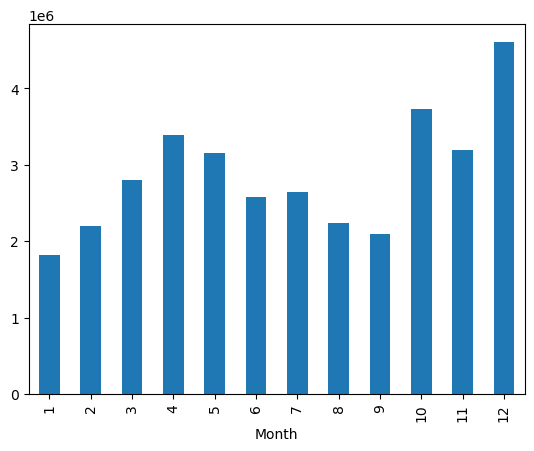

In [36]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')

In [37]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [39]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [40]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [44]:
all_data['city']=all_data['Purchase Address'].str.split(',').str.get(1)

In [48]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [49]:
pd.value_counts(all_data['city'])

city
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

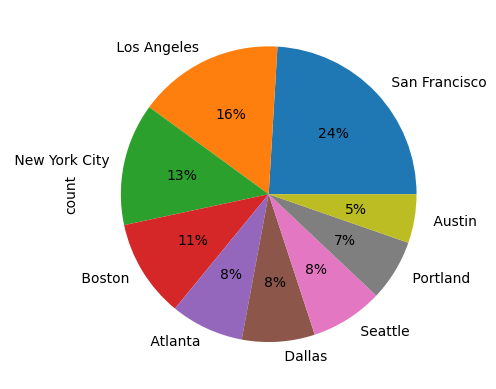

In [51]:
pd.value_counts(all_data['city']).plot(kind='pie', autopct='%1.0f%%')

In [53]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [61]:
count_df=all_data.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'})
count_df=count_df.reset_index()

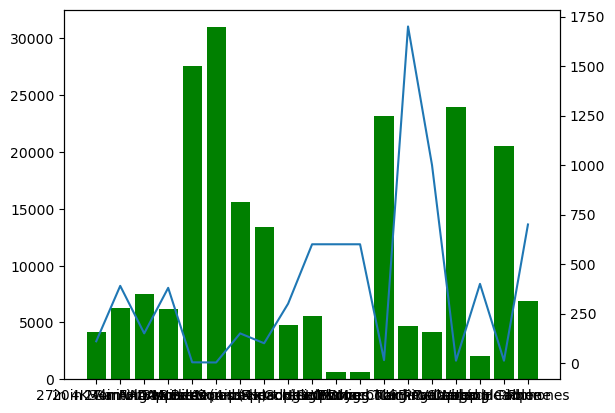

In [66]:
fig , ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='g')
ax2.plot(count_df['Product'], count_df['Price Each'])

In [67]:
all_data['Product'].value_counts().index

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [68]:
most_sold_product=all_data['Product'].value_counts().index

In [73]:
most_sold_product_df=all_data[all_data['Product'].isin(most_sold_product)]

In [74]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [77]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product               
1      20in Monitor               215
       27in 4K Gaming Monitor     313
       27in FHD Monitor           421
       34in Ultrawide Monitor     313
       AA Batteries (4-pack)     1037
                                 ... 
12     ThinkPad Laptop            537
       USB-C Charging Cable      2979
       Vareebadd Phone            284
       Wired Headphones          2537
       iPhone                     906
Length: 228, dtype: int64

In [79]:
pivot=most_sold_product_df.groupby(['Month','Product']).size().unstack()

<Axes: xlabel='Month'>

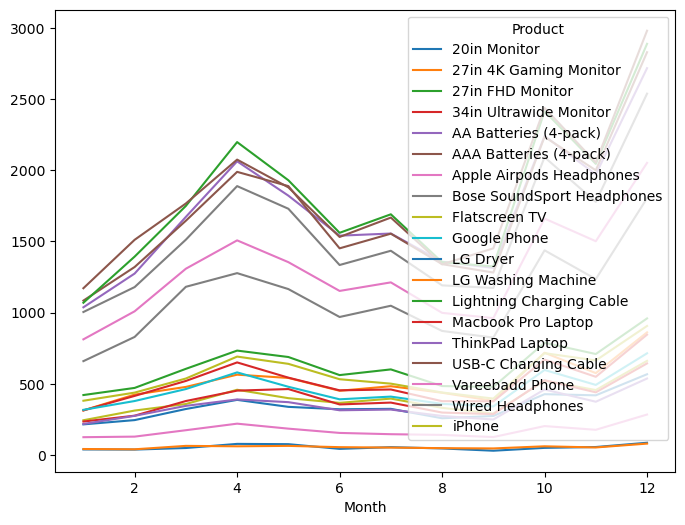

In [80]:
pivot.plot(figsize=(8,6))

In [81]:
 all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [82]:
all_data['Order ID'].duplicated(keep=False)

0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185686, dtype: bool

In [83]:
all_data[all_data['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [84]:
df_duplicated=all_data[all_data['Order ID'].duplicated(keep=False)]

In [85]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [89]:
dup_products=df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

In [90]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [92]:
dup_products_df=df_duplicated.merge(dup_products,how='left',on='Order ID')

In [93]:
no_dup_df=dup_products_df.drop_duplicates(subset=['Order ID'])

In [94]:
no_dup_df.shape


(6879, 10)

<Axes: ylabel='count'>

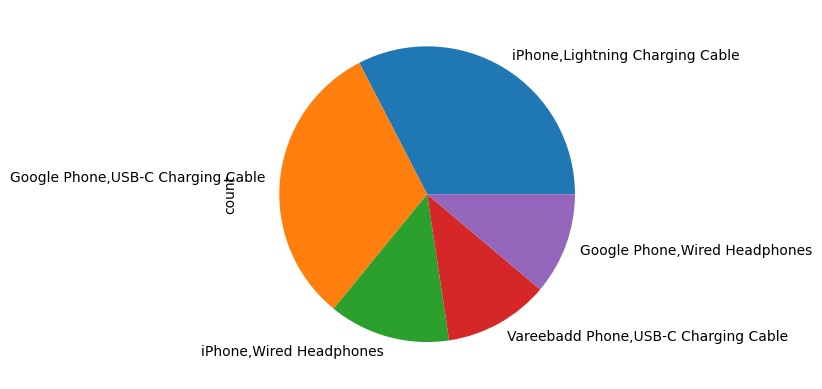

In [98]:
no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()